In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Make up some data 

In [4]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns = [*wt, *ko], index = genes)

In [6]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [8]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,88,89,90,91,70,419,450,439,399,422
gene2,277,306,319,326,286,586,558,574,552,596
gene3,15,18,17,19,17,637,639,635,654,606
gene4,22,21,33,31,18,124,105,106,114,113
gene5,781,820,720,808,761,48,65,42,66,59
...,...,...,...,...,...,...,...,...,...,...
gene96,780,772,854,810,786,150,149,154,155,156
gene97,170,156,152,169,177,919,878,840,852,897
gene98,569,563,615,578,559,163,131,155,124,159
gene99,863,914,930,856,911,737,735,737,720,737


In [9]:
data.shape

(100, 10)

# Let's do PCA

In [10]:
# center and scale data
scaled_data = preprocessing.scale(data.T)

In [11]:
scaled_data

array([[-0.98275724, -1.18078228, -1.00648237, -1.05743559,  1.00569909,
         1.09649983,  0.88622478, -0.84544028, -1.03545352,  1.31420635,
        -0.95490315, -1.02777116,  1.08825452,  0.95790894, -0.82181696,
        -1.11514691, -1.06097706, -1.0982685 ,  0.92320025,  0.83963851,
        -1.07040016, -1.02563577, -0.97242581, -1.10565322, -0.92242928,
         1.66092121, -0.51537303, -0.99123948,  0.83062498, -0.8432048 ,
        -1.42649559,  0.87206151, -0.99741631,  0.52003962, -1.03874002,
        -1.09707104, -0.94179099, -0.98132632, -0.93693708, -1.01949658,
         1.04366842,  0.97436737, -0.91060202,  0.92877566,  0.83888329,
         1.03415357,  1.10836014,  1.06753424, -1.03659265,  0.67596075,
        -1.04595953,  1.21748603,  1.20178815, -1.06606072,  1.01771676,
        -1.02487925, -0.99698144,  1.02033464, -0.82239858,  0.99330407,
        -1.19815134,  1.66317735,  0.99110689,  0.95718246,  1.33632133,
         1.2180575 , -1.76007491,  0.80962112, -1.0

In [12]:
pca = PCA()

In [14]:
pca.fit(scaled_data)

PCA()

In [15]:
pca_data = pca.transform(scaled_data)

In [16]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

Text(0.5, 1.0, 'Scree Plot')

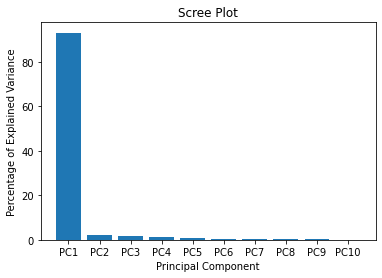

In [17]:
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

In [18]:
# Almost all of the variation is along the first PC, so a 2-D graph, using PC1 and PC2
# should do a good job representing the original data

In [19]:
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)

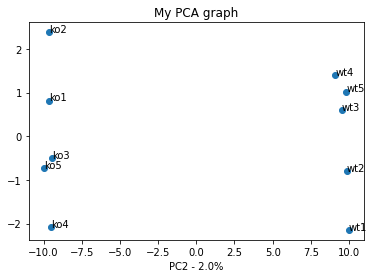

In [21]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.xlabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))